<a href="https://colab.research.google.com/github/jdavis2000josh/TetrisRL/blob/main/TetrisTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

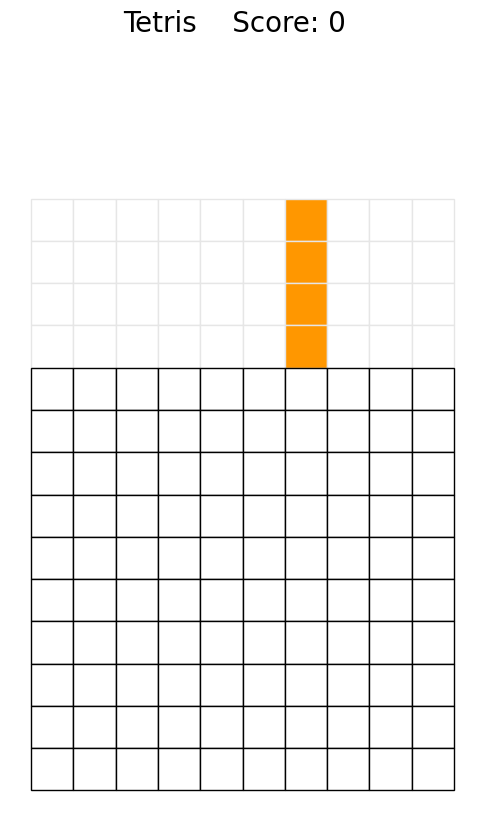

In [ ]:
import jax
import jumanji

env = jumanji.make('Tetris-v0')

# # Reset your (jit-able) environment
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.reset)(key)

# (Optional) Render the env state
env.render(state)

# Interact with the (jit-able) environment
action = env.action_spec().generate_value()          # Action selection (dummy value here)
state, timestep = jax.jit(env.step)(state, action)   # Take a step and observe the next state and time step

In [ ]:
action = state.action_spec().generate_value()          # Action selection (dummy value here)


state, timestep = jax.jit(env.step)(state, action)   # Take a step and observe the next state and time step

[[ True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True False False]
 [ True  True  True  True  True  True  True  True  True False]
 [ True  True  True  True  True  True  True  True False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

def get_action(state):
  array = np.array(state.action_mask)
  # Flatten the array
  flattened_array = array.flatten()
  # Get the indices of True values
  true_indices = np.where(flattened_array)[0]
  if len(true_indices) == 0:
        return False
  random_index = np.random.choice(true_indices)
  # Convert the random index to two-dimensional coordinates
  row_index, col_index = np.unravel_index(random_index, array.shape)
  return [row_index,col_index]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


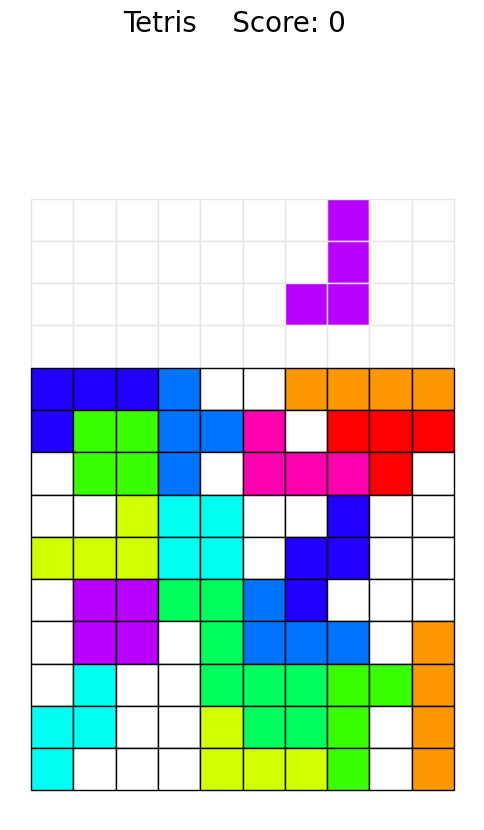

In [ ]:
key = jax.random.PRNGKey(0)
state, timestep = jax.jit(env.reset)(key)

for i in range(50):
  action = get_action(state)
  if action == False:
    key = jax.random.PRNGKey(0)
    state, timestep = jax.jit(env.reset)(key)
    print("Environment Reset")
    continue
  state, timestep = jax.jit(env.step)(state, action)
  env.render(state)
